# Exploratory Data Analysis

In [159]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Load the Titanic dataset
train_df = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/DSBA/github/titanic_for_datasci_class/train.csv')
test_df = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/DSBA/github/titanic_for_datasci_class/test.csv')
# Print the first few rows of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
# Get summary statistics for numeric columns
(train_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
# Check for missing values
(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

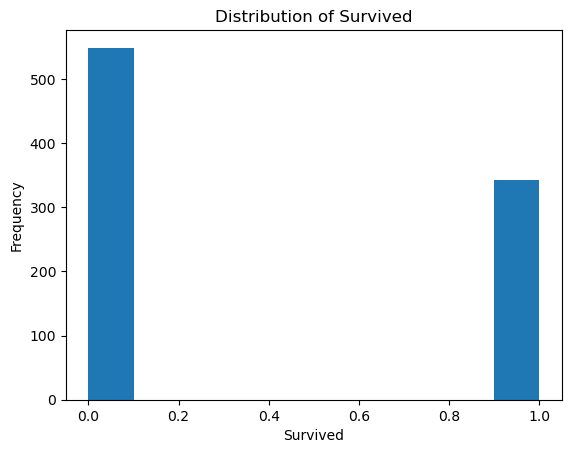

In [163]:
# Visualize the distribution of the target variable (Survived)
plt.hist(train_df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Distribution of Survived')
plt.show()

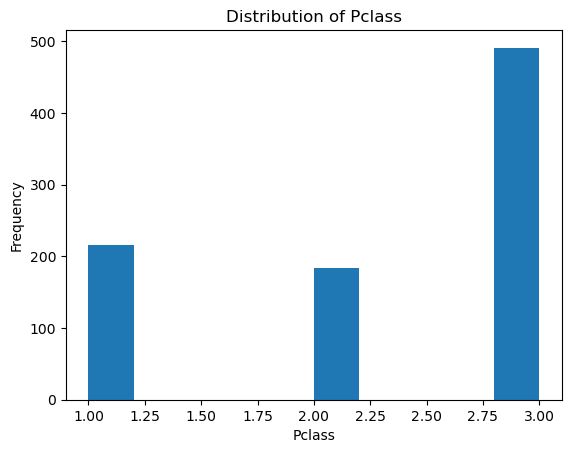

In [164]:
# Visualize the distribution of Pclass
plt.hist(train_df['Pclass'])
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Distribution of Pclass')
plt.show()

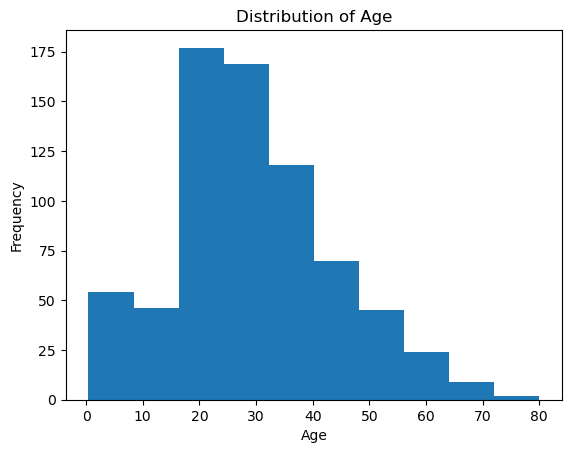

In [165]:
# Visualize the distribution of Age
plt.hist(train_df['Age'].dropna())
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

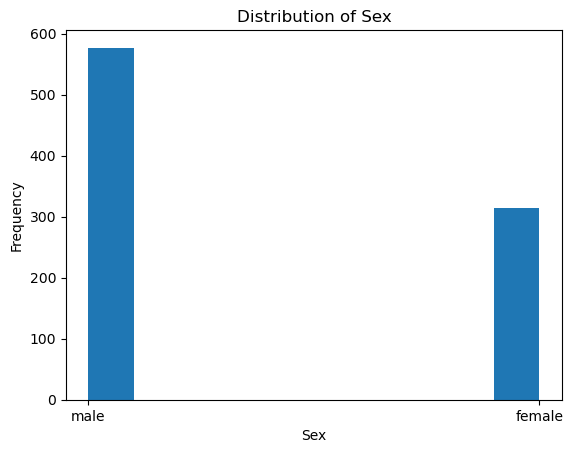

In [166]:
# Visualize the distribution of Sex
plt.hist(train_df['Sex'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
plt.show()

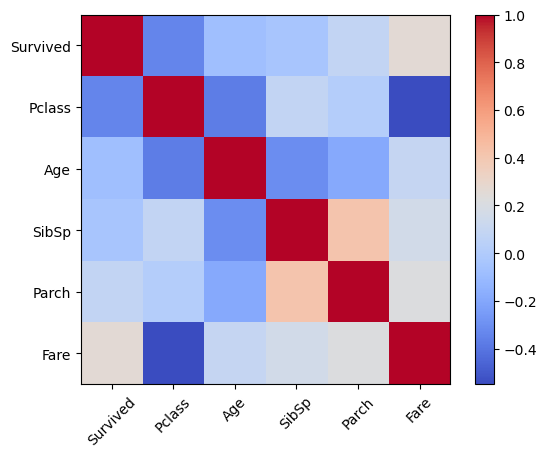

In [167]:
# Visualize the correlation between numeric features and the target variable
corr_df = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.imshow(corr_df, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(corr_df)), corr_df.columns, rotation=45)
plt.yticks(range(len(corr_df)), corr_df.columns)
plt.colorbar()
plt.show()

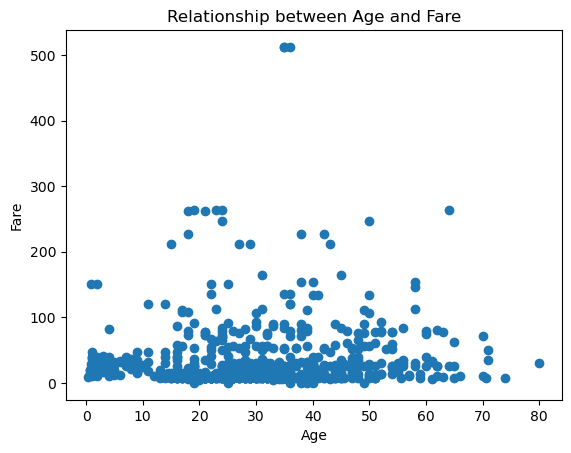

In [168]:
# Visualize the relationship between Age and Fare
plt.scatter(train_df['Age'], train_df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')
plt.show()

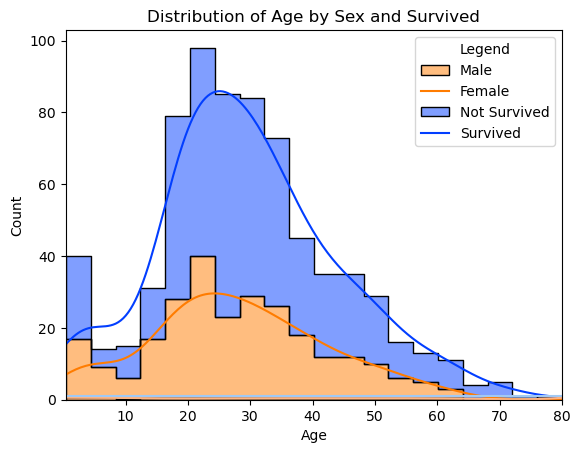

In [169]:
# Distribution of Age by Sex and Survived
sns.histplot(data=train_df, x="Age", hue="Sex", kde=True, multiple="stack", 
             hue_order=["male", "female"], element="step", alpha=0.5, palette="bright")
sns.histplot(data=train_df, x="Age", hue="Survived", kde=True, multiple="fill", 
             hue_order=[0, 1], element="step", alpha=0.5, palette="pastel")
plt.xlabel('Age')
plt.title('Distribution of Age by Sex and Survived')
plt.legend(title="Legend", labels=["Male", "Female", "Not Survived", "Survived"])
plt.show()

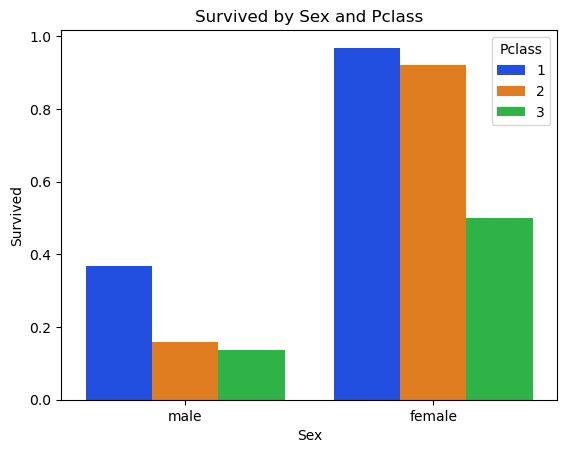

In [170]:
# Barplot of Survived by Sex and Pclass
sns.barplot(data=train_df, x="Sex", y="Survived", hue="Pclass", errorbar=None, palette="bright")
plt.title('Survived by Sex and Pclass')
plt.show()

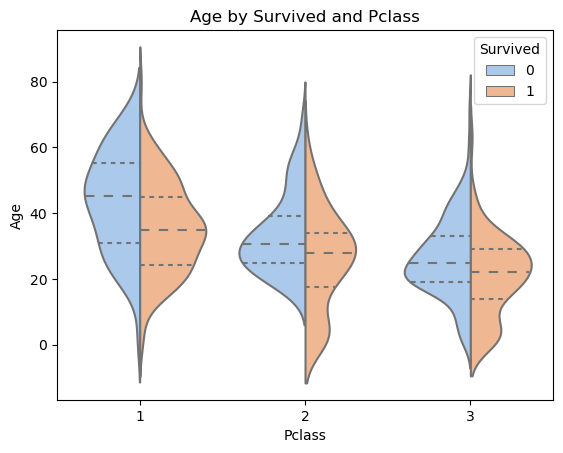

In [171]:
# Violinplot of Age by Survived and Pclass
sns.violinplot(data=train_df, x="Pclass", y="Age", hue="Survived", 
               split=True, inner="quart", palette="pastel")
plt.title('Age by Survived and Pclass')
plt.show()

# Preprocessing

In [172]:
# fill missing values in Age with median age of each Pclass
train_df['Age'] = train_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# fill missing values in Embarked with most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# fill missing values in Fare with median fare of each Pclass
test_df['Age'] = test_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Fare'] = test_df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.median()))


# Modeling

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Load the training data

# Preprocess the training data
train_df["Sex"] = pd.get_dummies(train_df["Sex"], drop_first=True)
train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
train_df = pd.get_dummies(train_df, columns=["Embarked"], drop_first=True)
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Load the test data

# Preprocess the test data
test_df["Sex"] = pd.get_dummies(test_df["Sex"], drop_first=True)
test_df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
test_df = pd.get_dummies(test_df, columns=["Embarked"], drop_first=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

X_test = test_df.drop("PassengerId", axis=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a submission dataframe and export to csv
submission_df = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
})

submission_df.to_csv("submission.csv", index=False)


/Users/jarkrunglerdkriangkrai/opt/anaconda3/envs/datasciclass3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
